Student Name:Chelliah Kanthanathan
Student ID:18263003

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [2]:
a_x = 0.05
a_y= 10

In [3]:
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [4]:
data.shape

(20, 2)


Data
[[ 0.         -4.09104661]
 [ 0.98645371  2.59625089]
 [ 2.03882868  3.69425755]
 [ 3.06782612  7.16329204]
 [ 3.90080084 16.92493827]
 [ 4.94542123 23.02736559]
 [ 6.12474667 26.62614072]
 [ 6.8851749  25.83922311]
 [ 7.98472269 33.55567278]
 [ 9.17215451 37.28065318]
 [ 9.86096865 41.89047717]
 [10.98278277 47.15758187]
 [12.06827432 48.71340597]
 [13.15106796 54.48430082]
 [13.97590058 54.22714915]
 [14.74993829 55.37340201]
 [15.75127907 62.545179  ]
 [17.13483406 71.58165812]
 [17.61503874 67.15196086]
 [18.82145402 78.6314672 ]]

Data Shape
(20, 2)

meanof_eachcolumn
[ 9.46088339 37.71866648]

center_column
[[ -9.46088339 -41.80971309]
 [ -8.47442968 -35.12241559]
 [ -7.42205471 -34.02440894]
 [ -6.39305727 -30.55537444]
 [ -5.56008255 -20.79372821]
 [ -4.51546216 -14.6913009 ]
 [ -3.33613672 -11.09252577]
 [ -2.57570849 -11.87944338]
 [ -1.4761607   -4.16299371]
 [ -0.28872888  -0.4380133 ]
 [  0.40008525   4.17181068]
 [  1.52189938   9.43891539]
 [  2.60739093  10.994739

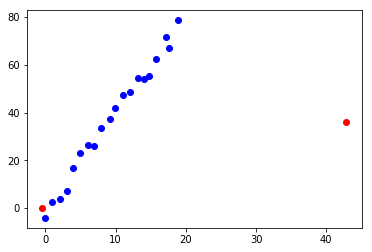

In [5]:
class PrincipalComponentAnalysis():

    a_x = 0.05
    a_y= 10
    
    def __init__(self,number_of_components):
        self.no_of_components = number_of_components
        self.populate_data()
        
    def populate_data(self):
        self.data =  np.array([[n*(1+self.a_x*(rand.random()-0.5)),4*n+ self.a_y*(rand.random()-0.5)] for n in range(20)])
        print ("\nData")
        print (self.data)
        print ("\nData Shape")
        print (self.data.shape)

    def myfit(self):
        # calculate mean of each column
        meanof_eachcolumn = np.mean(self.data.T,axis=1)
        print ("\nmeanof_eachcolumn")
        print (meanof_eachcolumn)
        
        # center column by subtracting column means
        center_column = self.data - meanof_eachcolumn
        print ("\ncenter_column")
        print (center_column)
        
        # calculate covariance matrix
        covar_matrix = np.cov(center_column.T)
        print ("\ncovar_matrix")
        print (covar_matrix)
    
        # calculate eigen vectors and eigne values
        self.eigen_values, self.eig_vector_matrix = eig(covar_matrix)
        print ("\neigen_values")
        print (self.eigen_values)
        print ("\neigen_vectors")
        print (self.eig_vector_matrix)
    
        # project Data
        projected_data = self.eig_vector_matrix.T.dot(center_column.T)
        print ("\nprojected_data using numpy")
        print (projected_data)
    
        # plot data    
        plt.plot(self.data[:,0],self.data[:,1],'bo')
        plt.plot(projected_data[:,0],projected_data[:,1],'or')

    def scikitfit(self):
        # create the PCA instance
        pca = PCA(self.no_of_components)
        # fit on data
        pca.fit(self.data)
        # access values and vectors
        print ("\neigen values")
        print(pca.explained_variance_)
        print ("\neigen vectors")
        print(pca.components_)
        # transform data
        print ("\nprojected_data using scikitlearn")
        B = pca.transform(self.data)
        print ("\n")
        print(B)

# Test Code
        

# Main
if __name__ == "__main__":

    # Compare PCA output between numpy fit and scikitlearn fit
    pca = PrincipalComponentAnalysis(2)
    pca.myfit()
    pca.scikitfit()
    
    # Use scikitlearn and compare the difference between number of components 1 and 2
    print ("\n scikitlearn PCA using number of components 1")
    pca1 = PrincipalComponentAnalysis(1)
    pca1.scikitfit()
    print ("\n scikitlearn PCA using number of components 2")
    pca2 = PrincipalComponentAnalysis(2)
    pca2.scikitfit()
    
    